# Telecom Data Churn Analysis

   In this project, the goal is to identify churn customers, that is, customers most likely to cancel subscription to a fictitious telecom company. Customer churn is a really interesting problem, because once identified, it is possible to focus on retention actions, providing adequate intervention to encourage them to stay and minimize customer exit. The dataset for this project was obtained from the [OpenML](https://www.openml.org/d/40701) public repository. The dataset relating features of account and usage for churn and non churn clients. In the context of this project, this is a problem of supervised classification and Machine Learning algorithms will be used for the development of predictive models and evaluation of accuracy and performance. It seeks to find the most appropriate model for the business.

# 1. Exploratory Analysis

In this approach, we will analyze datasets to summarize their main characteristics, with visual and quantitative methods.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import interp
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from sklearn import metrics, model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

%matplotlib inline

### 1.1 Load Data

The dataset can be downloaded in [link](https://github.com/thaiseq/Analytics/blob/master/churn.csv), attached to this project or in the official page in [OpenML](https://www.openml.org/d/40701).

In [85]:
# load csv
customers = pd.read_csv('churn.csv')

# convert categorical variable into dummy/indicator variables
customers = pd.get_dummies(customers)

# remove target and ID columns because the arbitrary ID data isn't relevant to the analysis
features = customers[customers.columns.difference(['area_code','phone_number', 'class'])]

# target
targets = customers[['class']]

### 1.2 Univariate Analysis

In [6]:
# describe the characteristics of variables
features.describe()

,account_length,international_plan,number_customer_service_calls,number_vmail_messages,state,total_day_calls,total_day_charge,total_day_minutes,total_eve_calls,total_eve_charge,total_eve_minutes,total_intl_calls,total_intl_charge,total_intl_minutes,total_night_calls,total_night_charge,total_night_minutes,voice_mail_plan
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,0.094600,1.570400,7.755200,25.99840,100.029400,30.649668,180.288900,100.191000,17.054322,200.636560,4.435200,2.771196,10.261780,99.919200,9.017732,200.391620,0.264600
std,39.69456,0.292691,1.306363,13.546393,14.80348,19.831197,9.162069,53.894699,19.826496,4.296843,50.551309,2.456788,0.745514,2.761396,19.958686,2.273763,50.527789,0.441164
min,1.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,0.000000,1.000000,0.000000,13.00000,87.000000,24.430000,143.700000,87.000000,14.140000,166.375000,3.000000,2.300000,8.500000,87.000000,7.510000,166.900000,0.000000
50%,100.00000,0.000000,1.000000,0.000000,26.00000,100.000000,30.620000,180.100000,100.000000,17.090000,201.000000,4.000000,2.780000,10.300000,100.000000,9.020000,200.400000,0.000000
75%,127.00000,0.000000,2.000000,17.000000,39.00000,113.000000,36.750000,216.200000,114.000000,19.900000,234.100000,6.000000,3.240000,12.000000,113.000000,10.560000,234.700000,1.000000
max,243.00000,1.000000,9.000000,52.000000,50.00000,165.000000,59.760000,351.500000,170.000000,30.910000,363.700000,20.000000,5.400000,20.000000,175.000000,17.770000,395.000000,1.000000


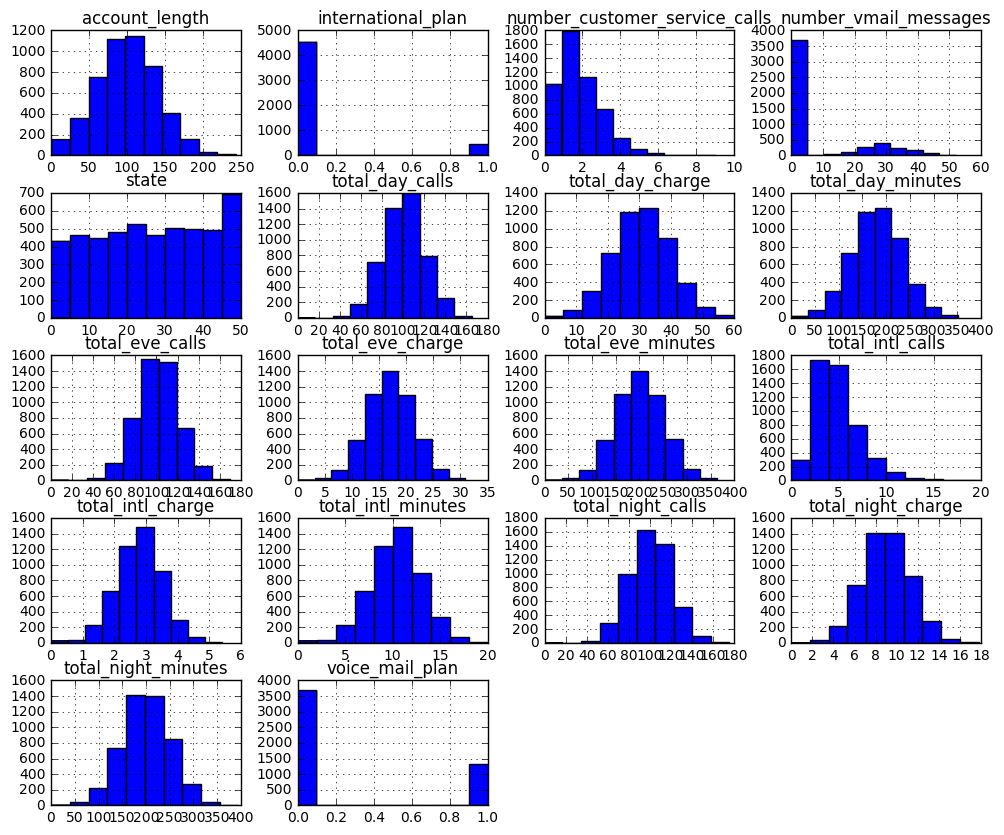

In [7]:
# analysis of the dispersion of the features
features.hist(figsize=(12,10))
plt.show()

The data included 5.000 users and by the exploratory analysis, it is observed that:

   * 14% of the base are classified as churn.
   * 50% of the customers who called the company more than 3 times are classified as Churn.
   * 10% of those with no international plan are classified as Churn x 8% of those with an international plan are Churn.
   * There are 18 attributes columns
   * There are no missing values.

### 1.3 Correlation matrix

A correlation matrix describing the correlation between the different features in the dataset.

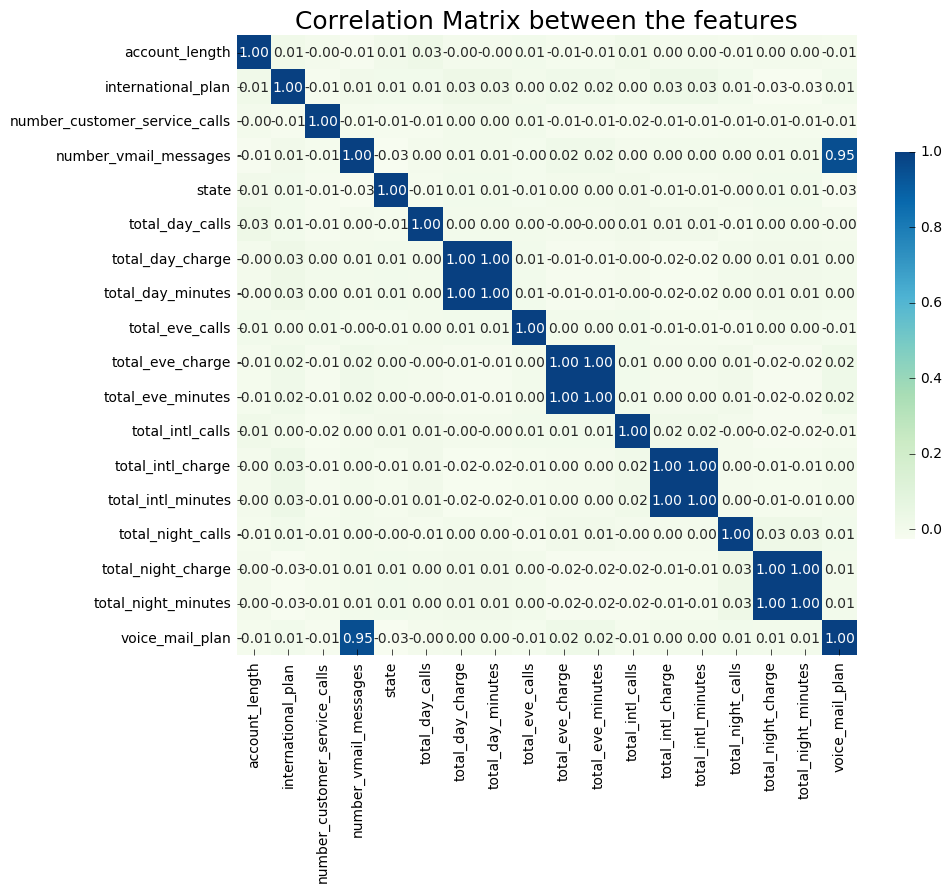

In [6]:
correlation_matrix = features.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(correlation_matrix, vmax=1, square=True, annot=True,fmt='.2f', cmap ='GnBu', cbar_kws={"shrink": .5}, robust=True)
plt.title('Correlation Matrix between the features', fontsize=18)
plt.show()

### 1.4 Pairwise relationships between the features

Grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. The diagonal Axes are treated differently, drawing a plot to show the univariate distribution of the data for the variable in that column.

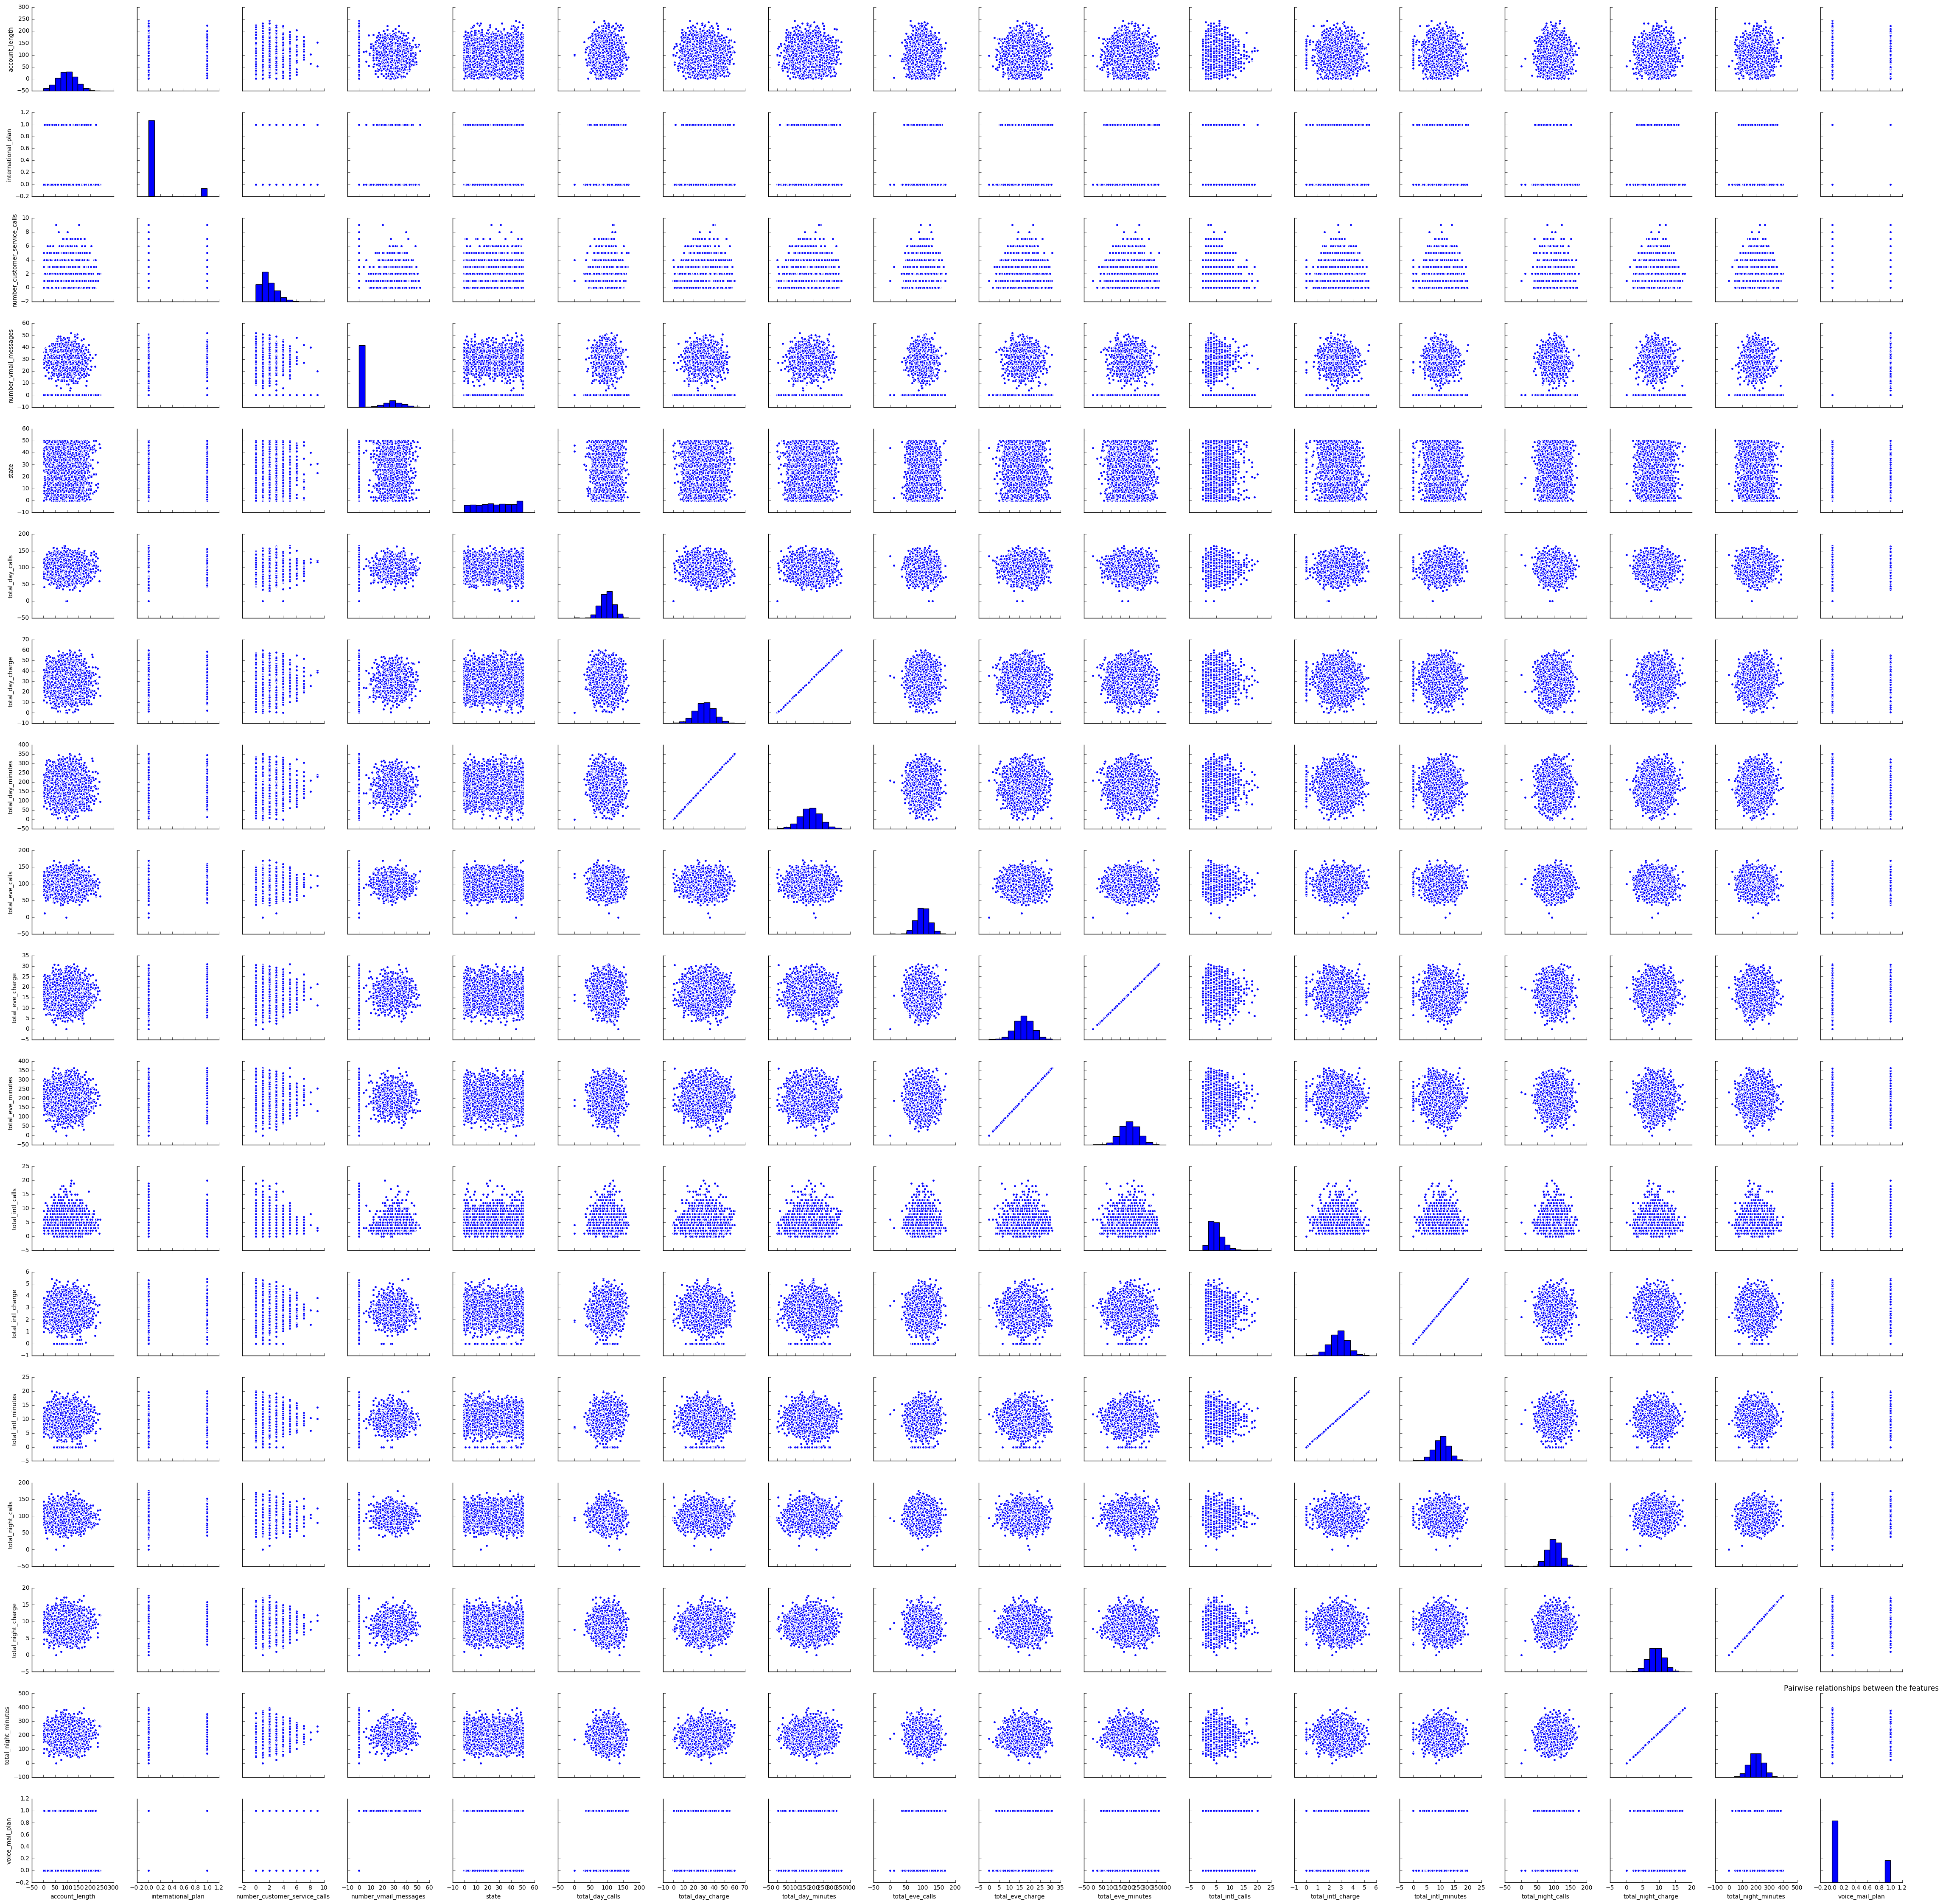

In [7]:
ax = sns.pairplot(features)
plt.title('Pairwise relationships between the features')
plt.show()

### 1.5 Features Importance

Feature selection process of finding and selecting the most useful features in a dataset. Unnecessary features decrease training speed, the model interpretability and the generalization performance on the test set.

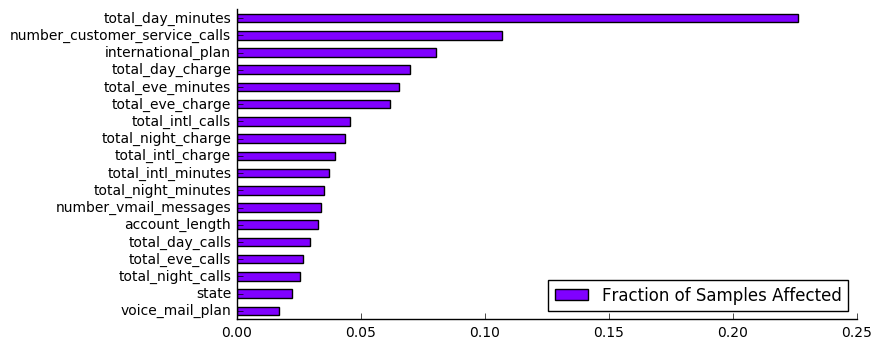

In [8]:
# Split dataset into random train and test subsets - random_state is the seed used by the random number generator
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, random_state=150)

rf = RandomForestClassifier() 
## Fit the model on your training data
rf.fit(X_train, y_train.values.ravel())
## And score it on your testing data
rf.score(X_test, y_test)
importance = pd.DataFrame(rf.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance',ascending=False)
# Plot the feature importance
feat_scores = pd.DataFrame({'Fraction of Samples Affected' : rf.feature_importances_},index=features.columns)
feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
feat_scores.plot(kind='barh', figsize=(8,4), colormap='rainbow')
sns.despine()

# 2. Models Analysis

Model 
 LogisticRegression
Scores 
                            Mean Accuracy:   0.86 
                            Mean Precision:  0.58 
                            Mean Recall:     0.17 
                            AUC:        0.82
Model 
 RandomForestClassifier
Scores 
                            Mean Accuracy:   0.95 
                            Mean Precision:  0.93 
                            Mean Recall:     0.68 
                            AUC:        0.91
Model 
 AdaBoostClassifier
Scores 
                            Mean Accuracy:   0.88 
                            Mean Precision:  0.66 
                            Mean Recall:     0.37 
                            AUC:        0.87
Model 
 GradientBoostingClassifier
Scores 
                            Mean Accuracy:   0.96 
                            Mean Precision:  0.93 
                            Mean Recall:     0.74 
                            AUC:        0.92


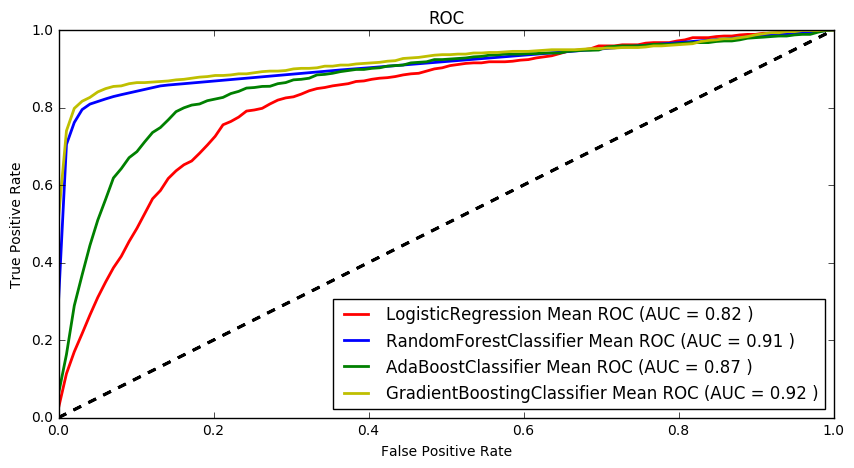

In [61]:
# k fold cross validation 
cv = StratifiedKFold(n_splits=5, shuffle=False)

# classifiers to be built
classifiersNames = ['LogisticRegression', 'RandomForestClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier']
classifiers = [LogisticRegression(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier()]

final_mean_fpr = []
final_mean_tpr = []
final_mean_auc = []
final_mean_acc = [] 
final_mean_prec = [] 
final_mean_rec = []

for classifier in classifiers:
    tprs = []
    aucs = []
    acc = []
    prec = []
    rec = []
    mean_fpr = np.linspace(0,1,100)
    
    for i, (train,test) in enumerate(cv.split(features,targets.values.ravel())):
        prediction = classifier.fit(features.iloc[train],targets.iloc[train].values.ravel()).predict_proba(features.iloc[test])
        fpr, tpr, t = roc_curve(targets.values.ravel()[test], prediction[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        
        #plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        #i= i+1
 
        y_pred = classifier.predict(features.iloc[test])
        
        accuracy = classifier.score(features.iloc[test], targets.values.ravel()[test])
        acc.append(accuracy)
        
        precision = precision_score(targets.values.ravel()[test], y_pred)
        prec.append(precision)
        
        recall = recall_score(targets.values.ravel()[test], y_pred)
        rec.append(recall)
        
        tn, fp, fn, tp = confusion_matrix(targets.values.ravel()[test], y_pred).ravel()
  
    
    mean_tpr = np.mean(tprs, axis=0)
    final_mean_tpr.append(mean_tpr)
    
    mean_auc = auc(mean_fpr, mean_tpr)
    final_mean_auc.append(mean_auc)
    
    mean_acc = np.mean(acc, axis=0)
    final_mean_acc.append(mean_acc) 
    
    mean_prec =  np.mean(prec, axis=0)
    final_mean_prec.append(mean_prec) 
    
    mean_rec =  np.mean(rec, axis=0)
    final_mean_rec.append(mean_rec) 
    
    final_mean_fpr.append(mean_fpr)

fig1 = plt.figure(figsize=[10,5])
for index, classifier in enumerate(classifiersNames):
    print("Model \n",str(classifiersNames[index]))
    
    
    print_out_scores = "Scores \n\
                            Mean Accuracy:   {:0.2f} \n\
                            Mean Precision:  {:0.2f} \n\
                            Mean Recall:     {:0.2f} \n\
                            AUC:        {:0.2f}".format(final_mean_acc[index], final_mean_prec[index], final_mean_rec[index], final_mean_auc[index])
    print(print_out_scores)       
    
    plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
    color=['r','b','g','y']
    plt.plot(final_mean_fpr[index], final_mean_tpr[index], color=color[index], label=r'%s Mean ROC (AUC = %0.2f )' % (str(classifiersNames[index]), final_mean_auc[index]), lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

# 3. Conclusion

The model did a good job of predicting churn and Gradient Boosted Classifier produced the highest AUC and the following scores:

    Accuracy: 96% labeled correctly
    Precision: 93% labeled as churn actually churned (5% were wrongly labeled as churn)
    Recall: 74% that actually churned were labeled as churn (2% of churn users were labeled as non-churn)
    
    
The best results achieved by the [OpenML](https://www.openml.org/t/167141) users for this set of dots have had results similar to this one, 95% accuracy using Random Forest. In this project, we were able to optimize this result using Gradient Boosted Classifier, with 96% accuracy.

